In [1]:
# Model calling and intial setup
import os
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_openai import AzureChatOpenAI
from dotenv import load_dotenv
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser 
import warnings
warnings.filterwarnings("ignore") 

load_dotenv()
# Load env
OPENROUTER_API_KEY = os.getenv("OPENROUTER_API_KEY")
GOOGLE_API_KEY = os.getenv("GOOGLE_API_KEY")
AZURE_BASE_URL = os.getenv("AZURE_BASE_URL")
AZURE_OPENAI_API_KEY = os.getenv("AZURE_OPENAI_API_KEY")
AZURE_CHAT_DEPLIOYMENT_NAME = os.getenv("AZURE_CHAT_DEPLIOYMENT_NAME")

parser = StrOutputParser()

llm_gemini = ChatGoogleGenerativeAI(model="gemini-2.0-flash" , api_key= GOOGLE_API_KEY)

llm_openai = AzureChatOpenAI(
    model="gpt-4o-mini",                         
    deployment_name=AZURE_CHAT_DEPLIOYMENT_NAME ,  # deployment name in Azure
    api_key=AZURE_OPENAI_API_KEY,
    azure_endpoint=AZURE_BASE_URL,
    api_version="2024-02-01"
) 
llm_openai.invoke("What are your creater, also what type of LLM are you").content
# llm_gemini.invoke("who is father of india").content

c:\Users\singh\Let's Gooooo\Langgraph\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


"I was created by OpenAI, and I am a language model based on the GPT-3 architecture. Specifically, I'm designed to understand and generate human-like text based on the input I receive. My purpose is to assist with a wide range of questions and tasks, from providing information to engaging in conversation. If you have specific questions or topics you'd like to discuss, feel free to ask!"

In [9]:
# ChatBot workflow
from langgraph.graph import StateGraph , START , END
from typing import TypedDict , Annotated
import operator
from langchain_core.messages import BaseMessage , HumanMessage
from langgraph.graph.message import add_messages

class ChatState(TypedDict):
    msg : Annotated[list[BaseMessage] , add_messages]
    
def chat(state:ChatState)->ChatState:
    chat_chain = llm_openai | parser
    
    ai_msg = chat_chain.invoke(state['msg'])
    return {"msg" : [ai_msg]}

# create graph

graph = StateGraph(ChatState)
graph.add_node("chat_Node" , chat)

graph.add_edge(START , "chat_Node")
graph.add_edge("chat_Node" , END)

chatbot_workflows = graph.compile()

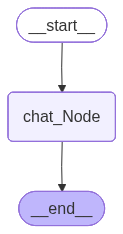

In [10]:
from IPython.display import Image
Image(chatbot_workflows.get_graph().draw_mermaid_png())

In [16]:
intial_state = {"msg": [HumanMessage(content= "Who is PM of India?")]}

final_state = chatbot_workflows.invoke(intial_state)
final_state['msg'][-1].content

'As of my last update in October 2023, the Prime Minister of India is Narendra Modi. He has been in office since May 2014, after his party, the Bharatiya Janata Party (BJP), won a majority in the general elections. If you need the most current information, please verify from a reliable source.'

In [ ]:
# chatbot loop

# we are using invoke in this, hence we are making a triggring a new state each time
while True:
    user_input = input("What you want to ask... for quit write x")
    if user_input == "x":
        break
    else:
        print("User : " , user_input)
        output = chatbot_workflows.invoke({"msg" : [HumanMessage(content=user_input)]})
        print("AI : ", output['msg'][-1].content)

User :  hey my name is shantnu
AI :  Hi Shantnu! How can I assist you today?
User :  what is my name?
AI :  I don't have access to personal information about users unless it has been shared with me in the course of our conversation. Therefore, I don't know your name. If you tell me your name, I can use it in our chat!


In [ ]:
# Using persitance

while True:
    user_input = input("What you want to ask... for quit write x")
    if user_input == "x":
        break
    else:
        print("User : " , user_input)
        output = chatbot_workflows.invoke({"msg" : [HumanMessage(content=user_input)]})
        print("AI : ", output['msg'][-1].content)